In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("../data/X_train_update.csv", index_col='Unnamed: 0')
target = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col='Unnamed: 0')

In [3]:
data.head()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [4]:
target.head()

,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


In [10]:
# Concaténation des features et des target dans un unique data
all_data = pd.concat([data,target], axis = 1 )

all_data.head()

,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705


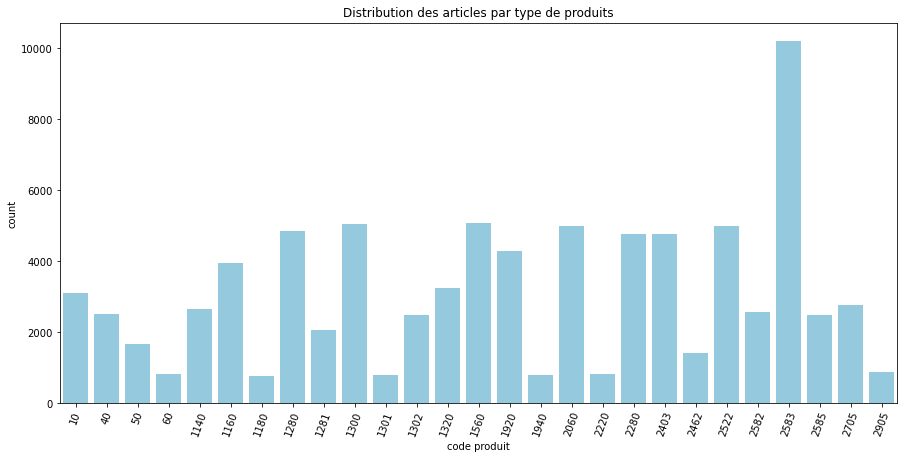

In [11]:
plt.figure(figsize=(15,7))

# affichage du nombre d'articles dans chaque catégorie dans le dataset
sns.countplot(x = all_data['prdtypecode'], color='skyblue');
plt.xticks(rotation=70);
plt.title('Distribution des articles par type de produits');
plt.xlabel('code produit');

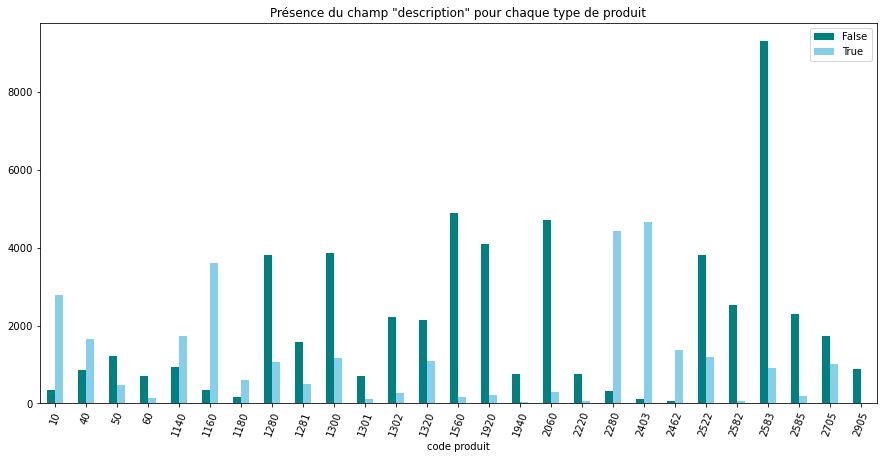

In [13]:
# Dichotomie des articles de chaque catégorie avec/sans champ "Descritpion" 
grouped = all_data.groupby('prdtypecode')['description'].apply(lambda x: x.isnull().value_counts())

# Affichage des résultats pour chaque catégorie 
fig, ax = plt.subplots(figsize=(15,7))

grouped.unstack().plot(kind='bar', ax=ax, color=['teal',"skyblue"])

plt.title('Présence du champ "description" pour chaque type de produit');
plt.xlabel('code produit')
plt.xticks(rotation=70);

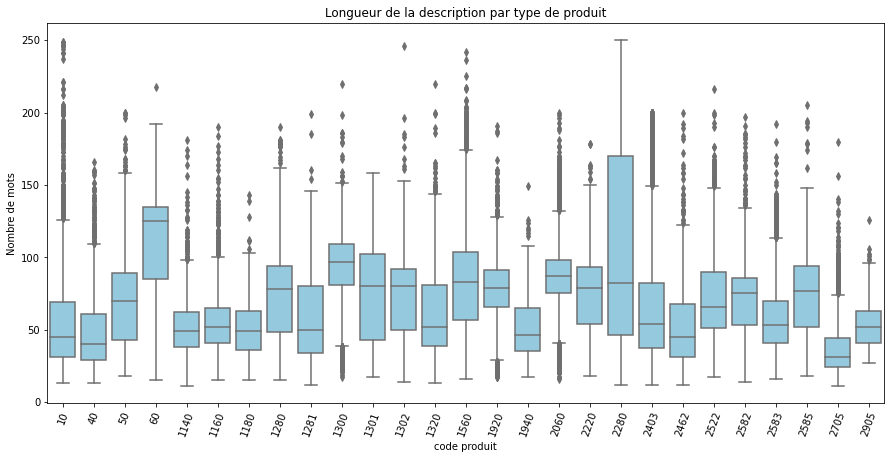

In [15]:
# Longueur du champ ‘Designation’ en fonction de ‘prdtypecode’, présenté sous forme de boîtes à moustache
plt.figure(figsize=(15, 7))

sns.boxplot(x = all_data['prdtypecode'],
            y = all_data['designation'].apply(len), 
            data = all_data, 
            color = 'skyblue')

plt.title('Longueur de la description par type de produit')
plt.xticks(rotation=70)
plt.ylabel('Nombre de mots')
plt.xlabel('code produit');